In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("crop_yield_dataset.csv")
df.head()

,rainfall_mm,temperature_celsius,soil_fertility_index,fertilizer_kg_per_acre,pesticide_ml_per_acre,yield_kg_per_acre
0,660.681427,21.319093,0.926432,150.762424,107.741622,52.851754
1,970.706372,24.403107,0.419545,185.292147,133.758653,78.695756
2,929.360574,19.750132,0.478456,133.406696,79.872746,60.178694
3,729.612725,27.797606,0.865399,171.777764,124.609071,56.100098
4,945.069939,27.833797,0.632507,191.937070,53.339161,64.428920


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rainfall_mm             10000 non-null  float64
 1   temperature_celsius     10000 non-null  float64
 2   soil_fertility_index    10000 non-null  float64
 3   fertilizer_kg_per_acre  10000 non-null  float64
 4   pesticide_ml_per_acre   10000 non-null  float64
 5   yield_kg_per_acre       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [ ]:
df.isnull().sum()

,0
rainfall_mm,0
temperature_celsius,0
soil_fertility_index,0
fertilizer_kg_per_acre,0
pesticide_ml_per_acre,0
yield_kg_per_acre,0


[]

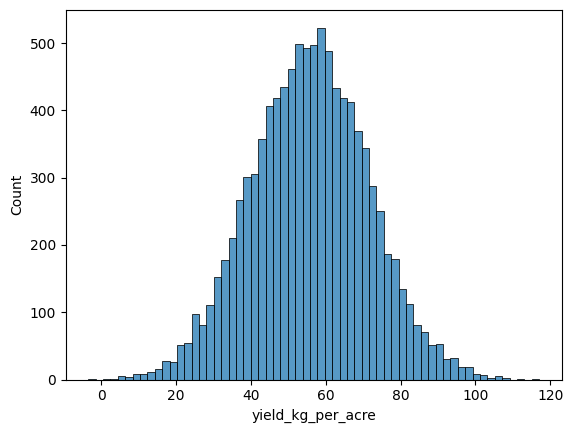

In [ ]:
sns.histplot(df["yield_kg_per_acre"])
plt.plot()

In [ ]:
x = df.drop(columns=["yield_kg_per_acre"])
y = df["yield_kg_per_acre"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 7.994637290991105
Mean Squared Error: 97.77135807312389
R-squared Score: 0.6005322067104406


In [ ]:
df.head()

,rainfall_mm,temperature_celsius,soil_fertility_index,fertilizer_kg_per_acre,pesticide_ml_per_acre,yield_kg_per_acre
0,660.681427,21.319093,0.926432,150.762424,107.741622,52.851754
1,970.706372,24.403107,0.419545,185.292147,133.758653,78.695756
2,929.360574,19.750132,0.478456,133.406696,79.872746,60.178694
3,729.612725,27.797606,0.865399,171.777764,124.609071,56.100098
4,945.069939,27.833797,0.632507,191.937070,53.339161,64.428920


In [ ]:
print("Enter the following values for prediction:")
r = input("rainfall_mm: ")
t = float(input("temperature_celsius: "))
s = float(input("soil_fertility_index: "))
f = float(input("fertilizer_kg_per_acre: "))
p = float(input("pesticide_ml_per_acre: "))

new_data = pd.DataFrame({'rainfall_mm': [r], 'temperature_celsius': [t], 'soil_fertility_index': [s], 'fertilizer_kg_per_acre': [f], 'pesticide_ml_per_acre': [p]})
new_data = scaler.transform(new_data)
predicted_consumption = model.predict(new_data)
print("yield_kg_per_acre:", predicted_consumption[0])

Enter the following values for prediction:
rainfall_mm: 945
temperature_celsius: 27
soil_fertility_index: 0.6333
fertilizer_kg_per_acre: 192
pesticide_ml_per_acre: 53.00
yield_kg_per_acre: 77.38586858777126
